In [1]:
import os

from dotenv import load_dotenv

from dynamic_pricing.core.db_utils import get_db_connection, load_order_data
import pandas as pd
import matplotlib.pyplot as plt
import itertools


load_dotenv()
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option("future.no_silent_downcasting", True)

### Establish database connection

In [ ]:
conn = get_db_connection()

df: pd.DataFrame = load_order_data(conn, os.getenv("PARTNER1"))
print(df.info)

In [3]:
print(df.columns)
df.head()
df.fillna(0, inplace=True)

exclusion_categories = [
    "Desserts",
    "Soft Drinks",
    "Starters and Sharers",
    "Handmade Single Grills",
]

for category in exclusion_categories:
    df = df[~df["item_operational_name"].str.contains(category)]


Index(['order_id', 'platform_order_id', 'platform_order_number',
       'order_status', 'order_placed_timestamp', 'order_updated_timestamp',
       'order_prepare_for_timestamp', 'order_start_prepping_at_timestamp',
       'customer_id', 'first_name', 'contact_number', 'contact_access_code',
       'partner_id', 'partner_name', 'item_id', 'platform_item_id',
       'item_name', 'item_operational_name', 'item_fractional_cost',
       'item_quantity', 'item_fractional_price', 'modifier_id',
       'platform_modifier_id', 'modifier_name', 'modifier_operational_name',
       'modifier_quantity', 'modifier_fractional_price'],
      dtype='object')


Filter to keep only the items we are analyzing

In [4]:
pre_dp_df = df[
    (df["order_placed_timestamp"] >= "2023-06-26")
    & (df["order_placed_timestamp"] < "2023-7-17")
]
pre_dp_df = pre_dp_df[~pre_dp_df["item_operational_name"].str.contains("Wrap")]

pre_dp_df.info()


post_dp_df = df[
    (df["order_placed_timestamp"] >= "2023-7-17")
    & (df["order_placed_timestamp"] < "2023-8-07")
]

post_dp_df = post_dp_df[~post_dp_df["item_operational_name"].str.contains("Wrap")]

post_dp_df.info()

interval = 30

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 6 to 235
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   order_id                           50 non-null     int64         
 1   platform_order_id                  50 non-null     object        
 2   platform_order_number              50 non-null     int64         
 3   order_status                       50 non-null     object        
 4   order_placed_timestamp             50 non-null     datetime64[ns]
 5   order_updated_timestamp            50 non-null     datetime64[ns]
 6   order_prepare_for_timestamp        50 non-null     datetime64[ns]
 7   order_start_prepping_at_timestamp  50 non-null     datetime64[ns]
 8   customer_id                        50 non-null     object        
 9   first_name                         50 non-null     object        
 10  contact_number                     50 non-nu

In [5]:
from dynamic_pricing.analysis.metrics import split_weekdays_and_weekends


pre_dp_df_weekdays, pre_dp_df_weekends = split_weekdays_and_weekends(
    pre_dp_df, "order_placed_timestamp"
)
post_dp_df_weekdays, post_dp_df_weekends = split_weekdays_and_weekends(
    post_dp_df, "order_placed_timestamp"
)

### Data analysis of core demand and supply metrics
The four images generated after each sell represent pre-dp weekday, pre-dp weekend, post-dp weekday, and post-dp weekend plots

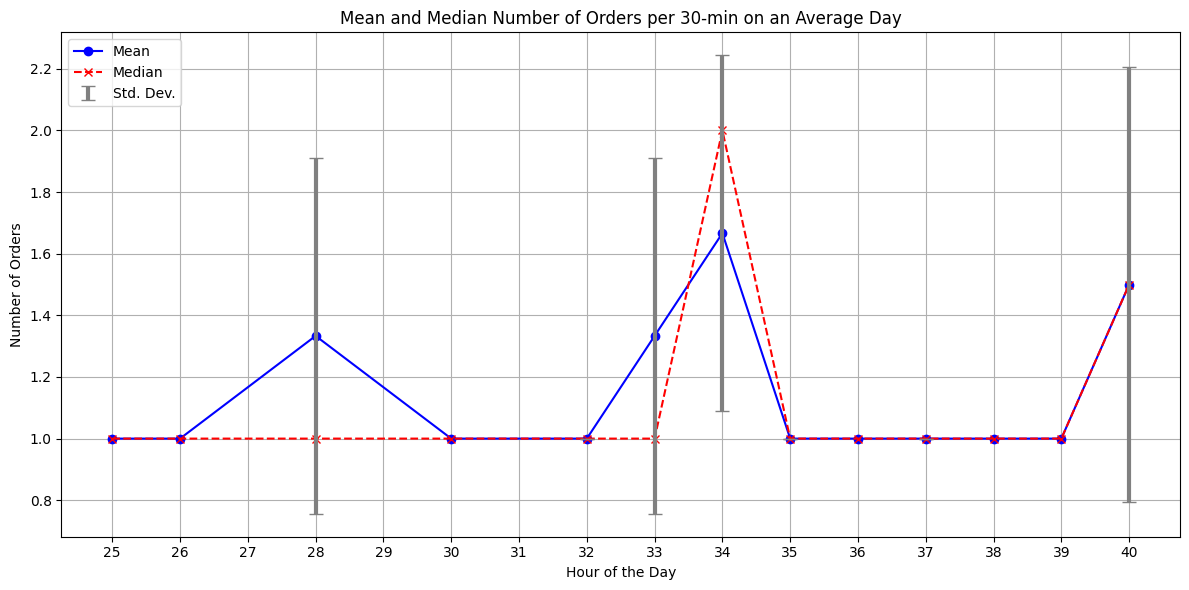

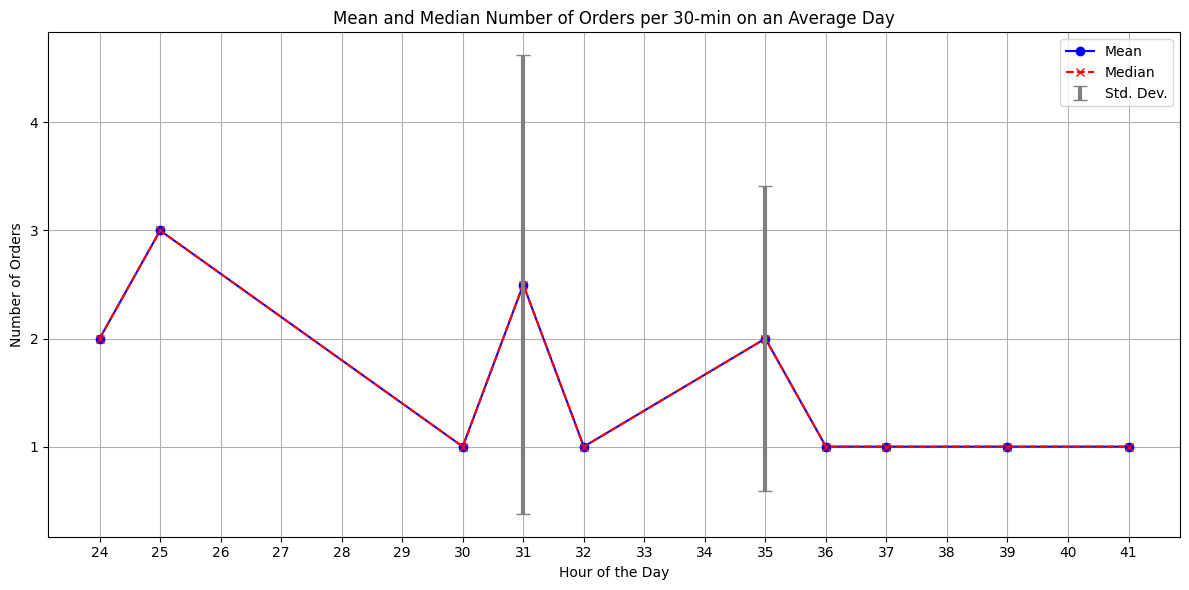

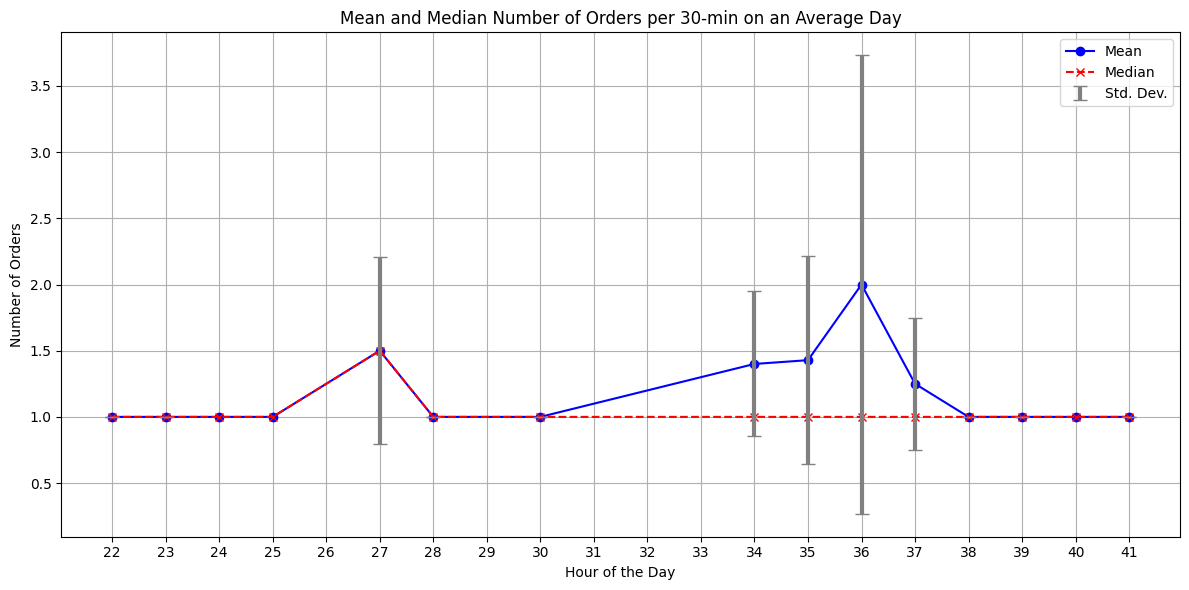

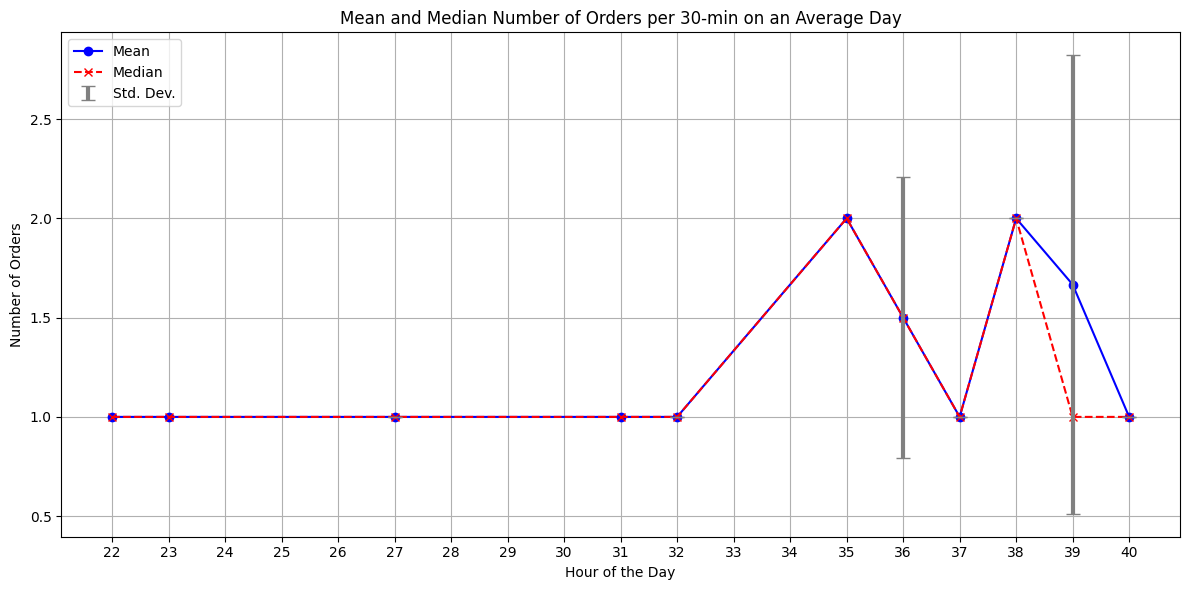

In [6]:
from dynamic_pricing.analysis.metrics import calculate_average_orders_per_interval

calculate_average_orders_per_interval(pre_dp_df_weekdays, interval=interval, plot=True)
calculate_average_orders_per_interval(pre_dp_df_weekends, interval=interval, plot=True)

calculate_average_orders_per_interval(post_dp_df_weekdays, interval=interval, plot=True)
calculate_average_orders_per_interval(post_dp_df_weekends, interval=interval, plot=True)

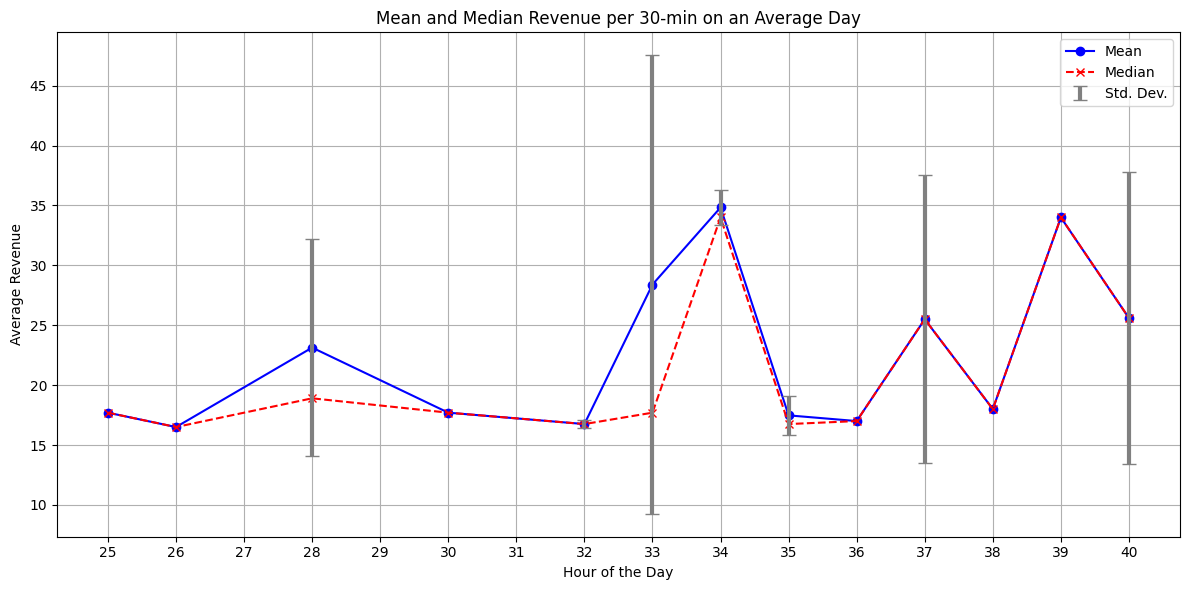

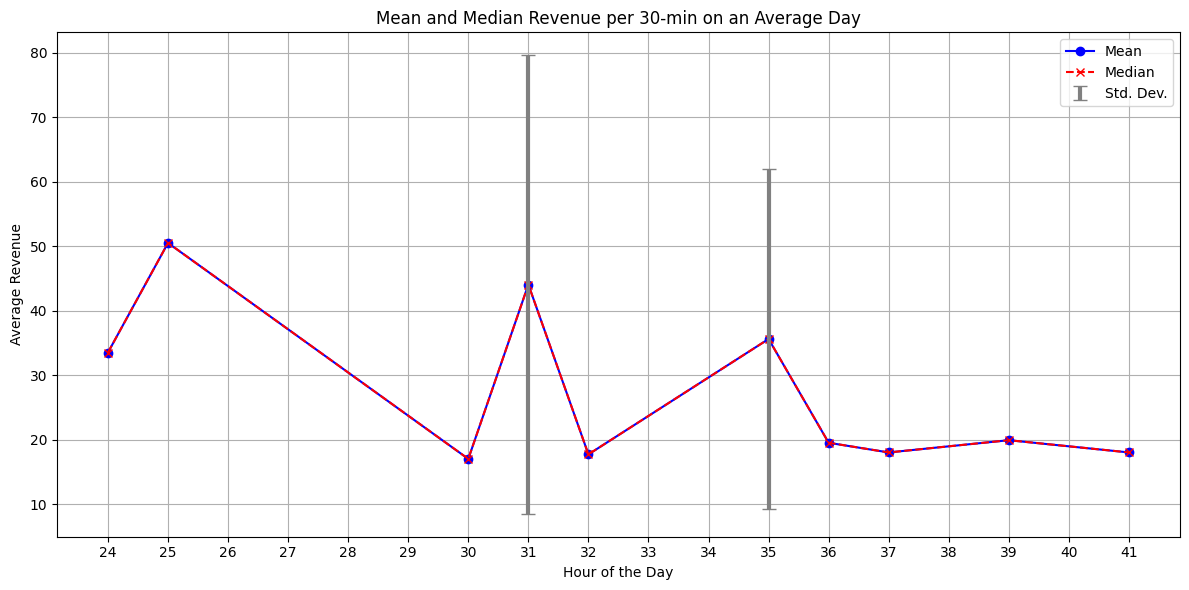

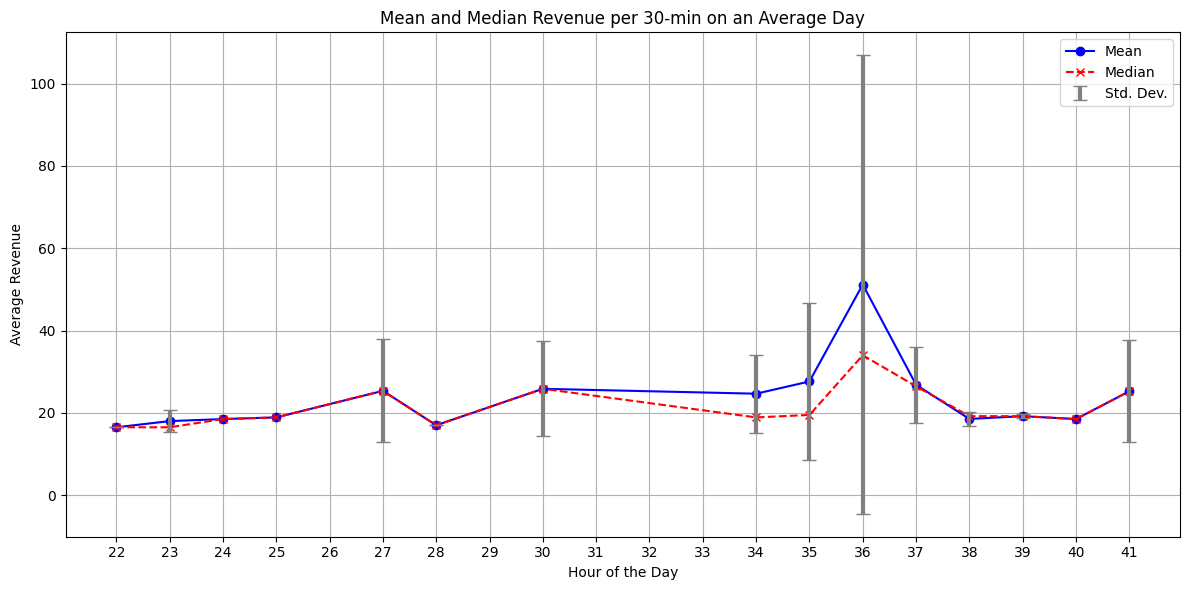

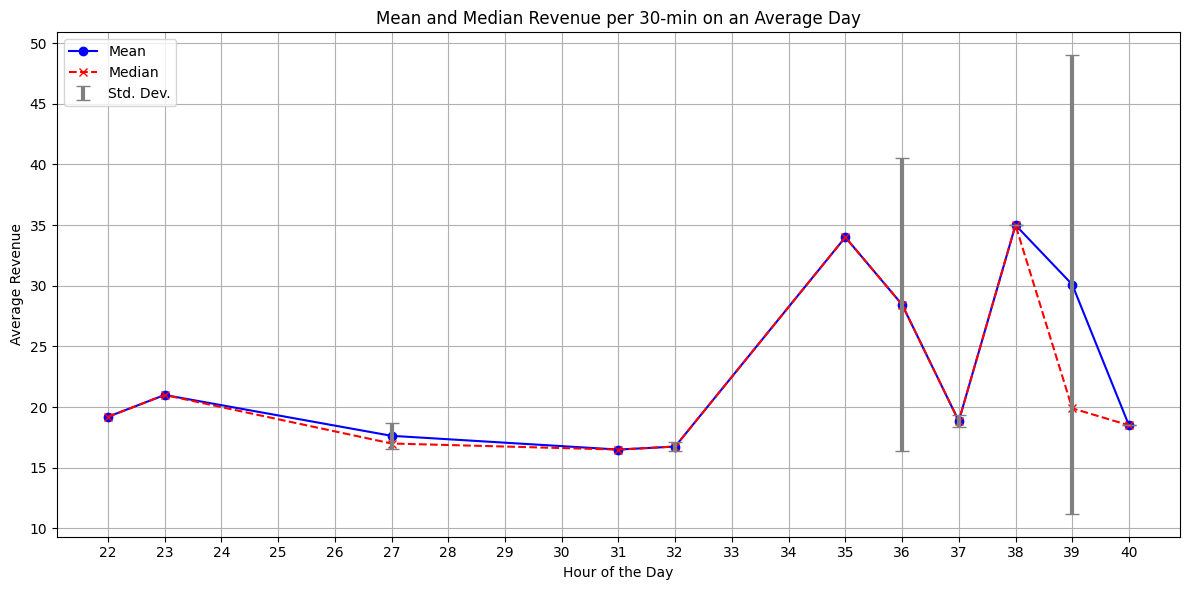

In [7]:
from dynamic_pricing.analysis.metrics import calculate_average_revenue_per_interval

calculate_average_revenue_per_interval(pre_dp_df_weekdays, interval, plot=True)
calculate_average_revenue_per_interval(pre_dp_df_weekends, interval,plot=True)

calculate_average_revenue_per_interval(post_dp_df_weekdays, interval,plot=True)
calculate_average_revenue_per_interval(post_dp_df_weekends, interval,plot=True)

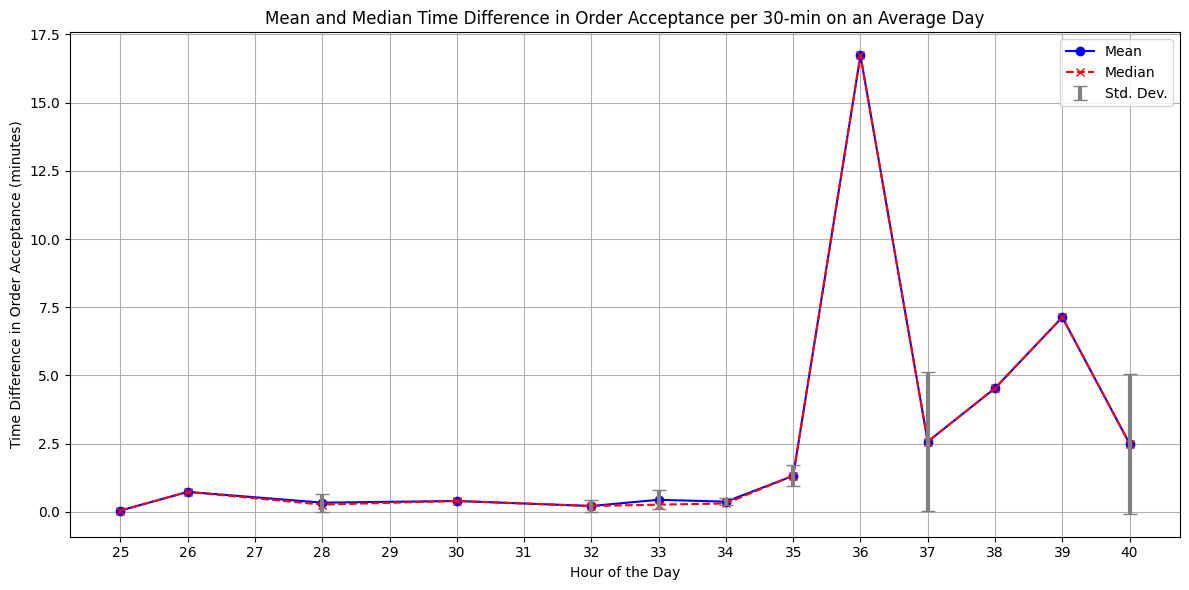

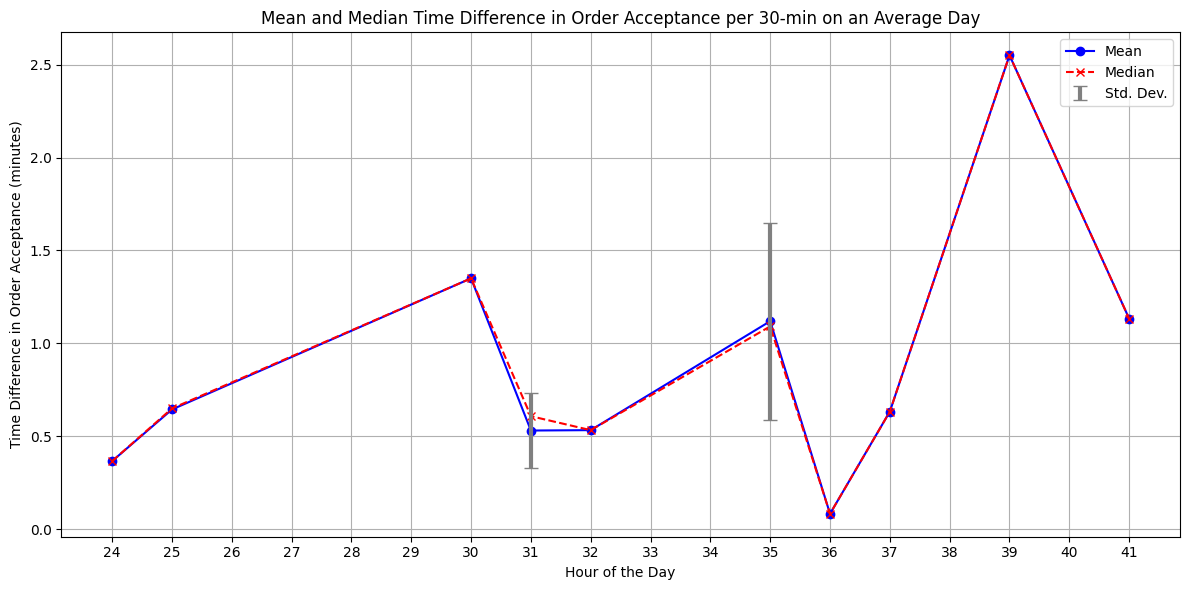

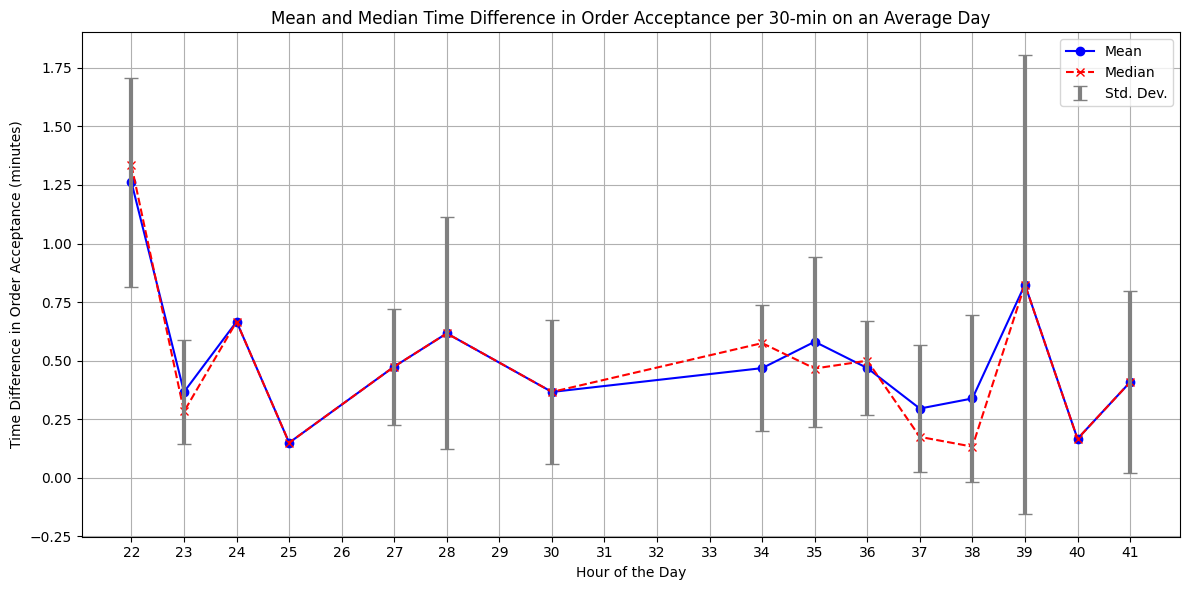

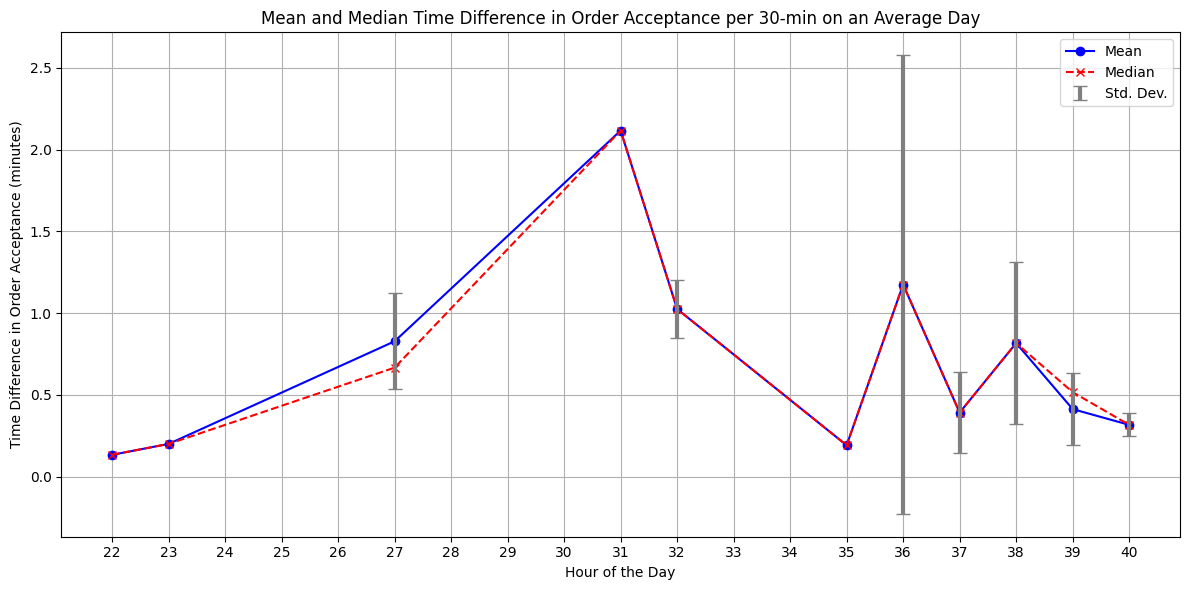

In [8]:
from dynamic_pricing.analysis.metrics import (
    calculate_time_difference_in_order_acceptance_per_interval,
)

calculate_time_difference_in_order_acceptance_per_interval(
    pre_dp_df_weekdays, interval, plot=True
)
calculate_time_difference_in_order_acceptance_per_interval(
    pre_dp_df_weekends, interval, plot=True
)

calculate_time_difference_in_order_acceptance_per_interval(
    post_dp_df_weekdays, interval, plot=True
)
calculate_time_difference_in_order_acceptance_per_interval(
    post_dp_df_weekends, interval, plot=True
)

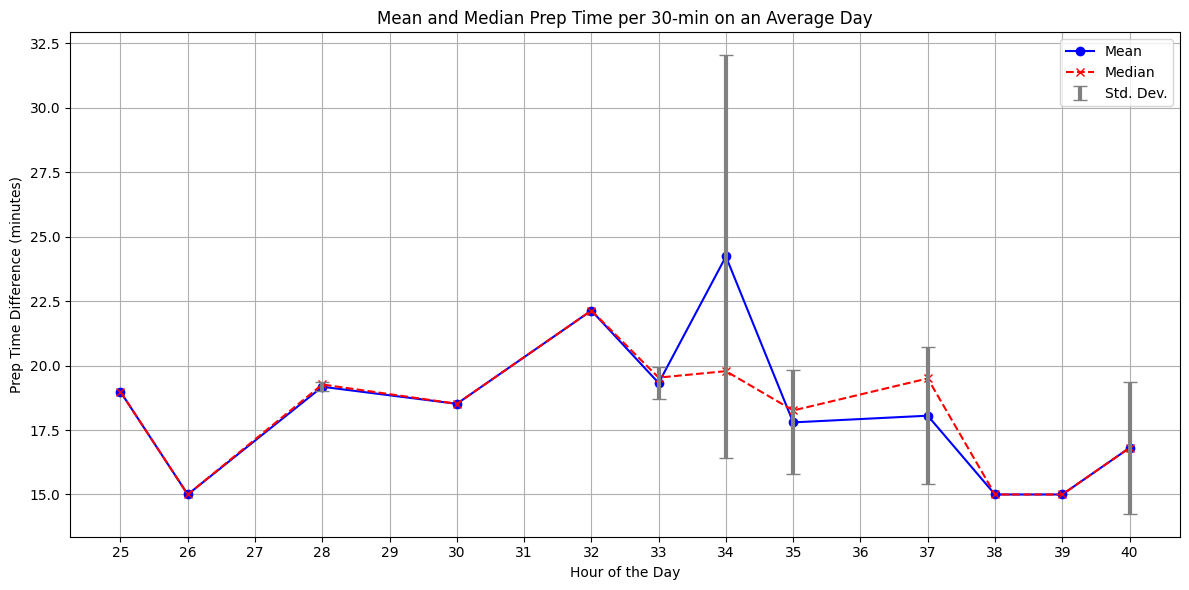

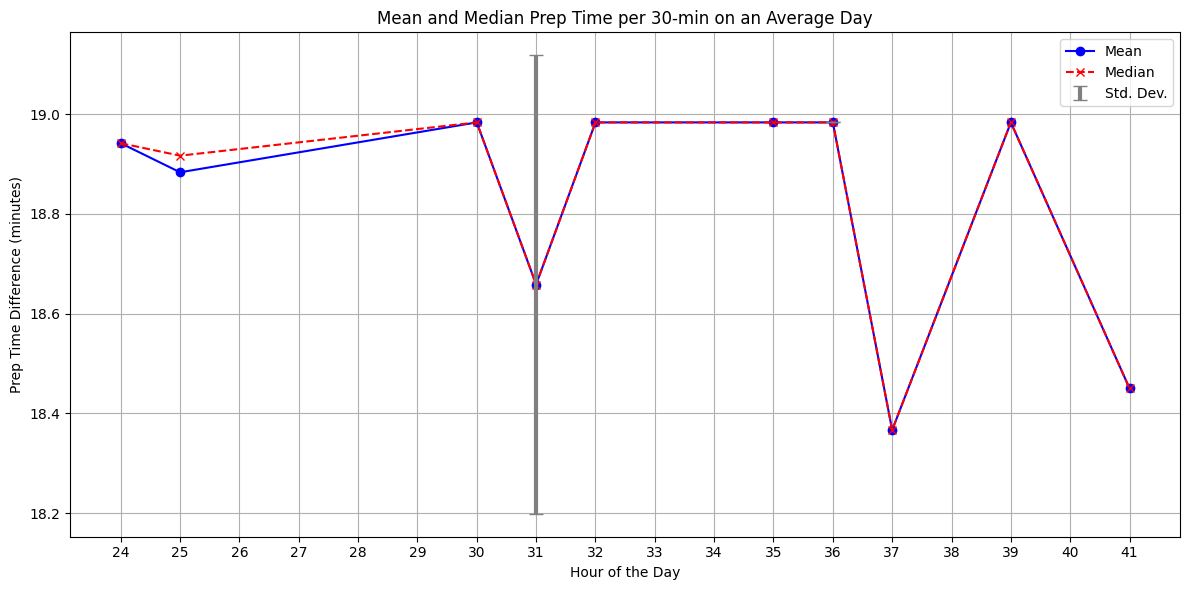

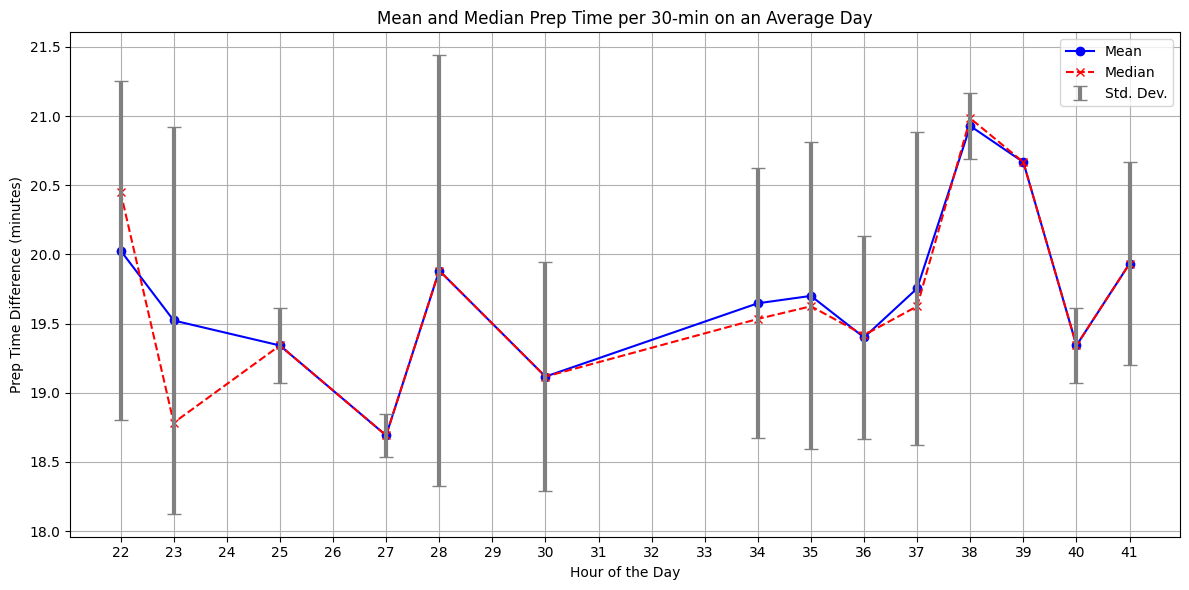

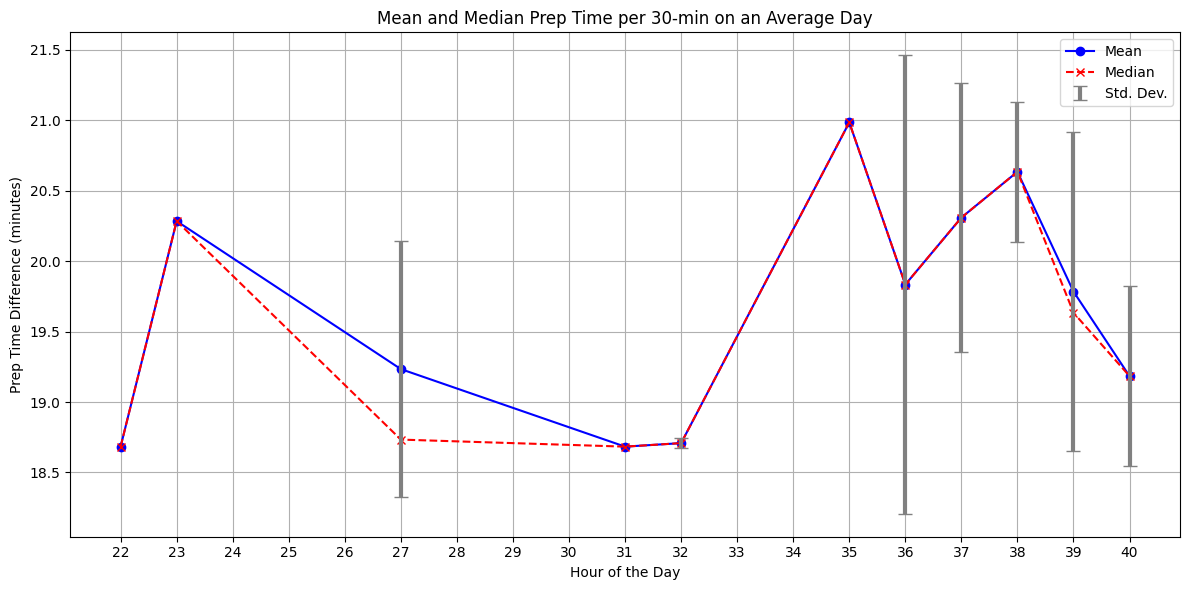

In [9]:
from dynamic_pricing.analysis.metrics import calculate_prep_time_per_interval

calculate_prep_time_per_interval(pre_dp_df_weekdays, interval, plot=True)
calculate_prep_time_per_interval(pre_dp_df_weekends, interval, plot=True)

calculate_prep_time_per_interval(post_dp_df_weekdays, interval, plot=True)
calculate_prep_time_per_interval(post_dp_df_weekends, interval, plot=True)

In [10]:
### Additional analytics

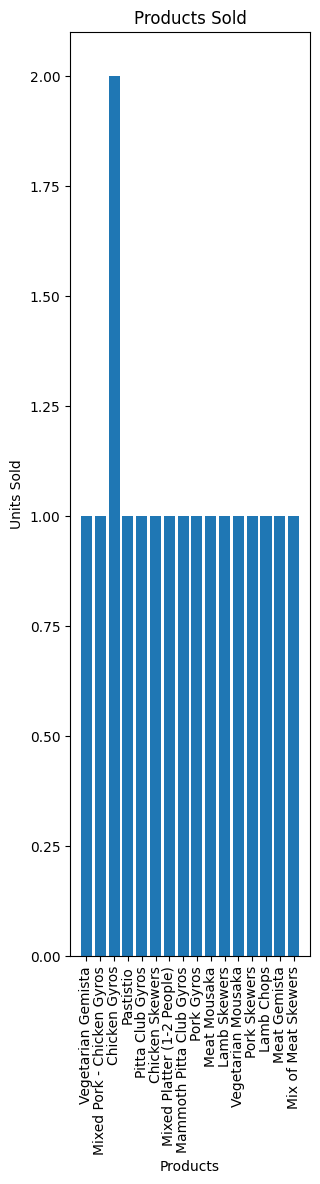

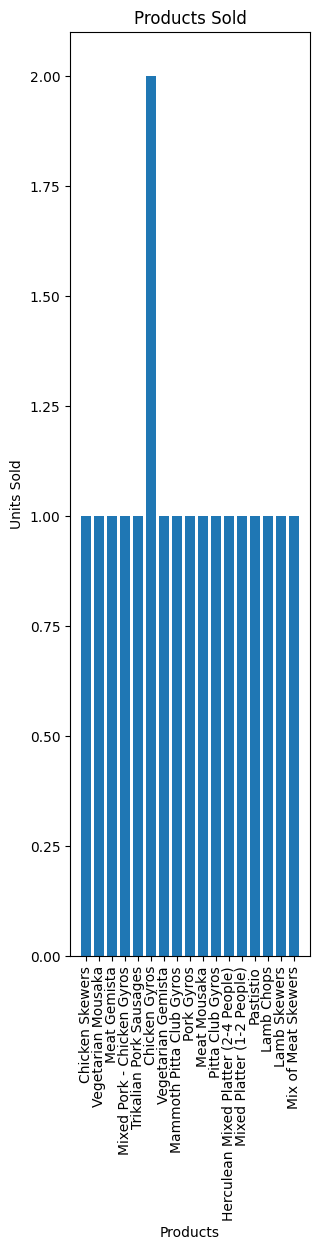

In [11]:
from dynamic_pricing.analysis.metrics import calculate_items_sold

calculate_items_sold(pre_dp_df,plot=True)
calculate_items_sold(post_dp_df, plot=True)

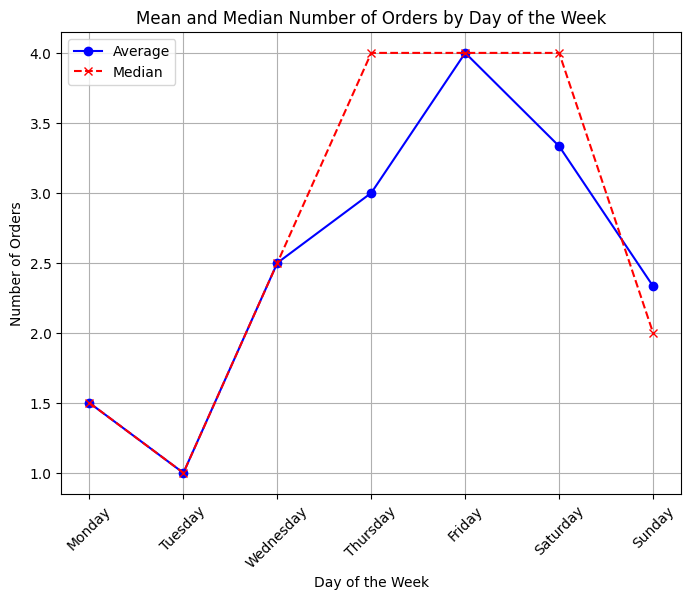

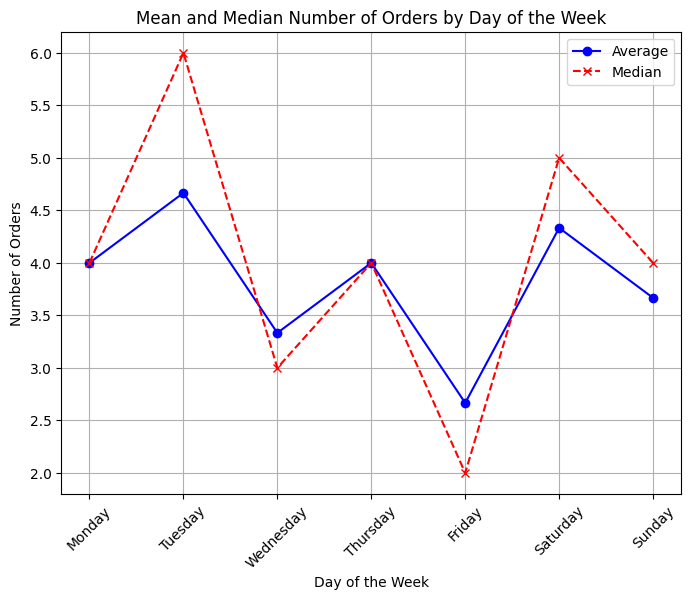

In [12]:
from dynamic_pricing.analysis.metrics import calculate_average_orders_by_day_of_week

calculate_average_orders_by_day_of_week(pre_dp_df,plot=True)
calculate_average_orders_by_day_of_week(post_dp_df,plot=True)

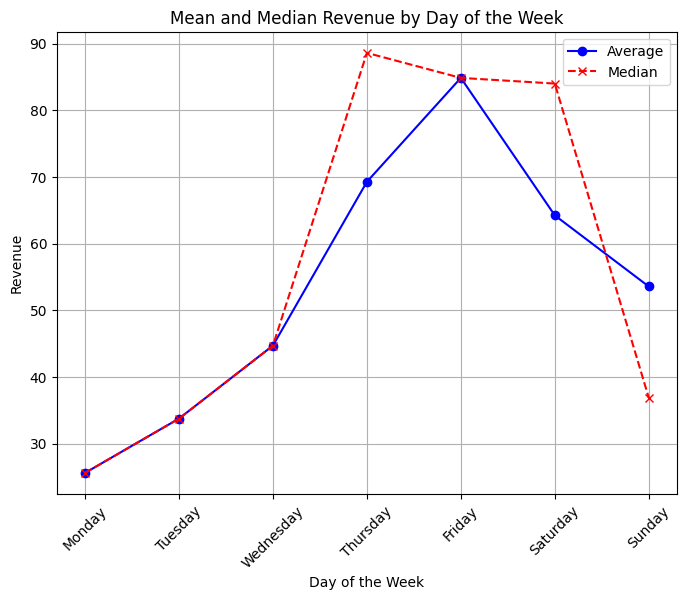

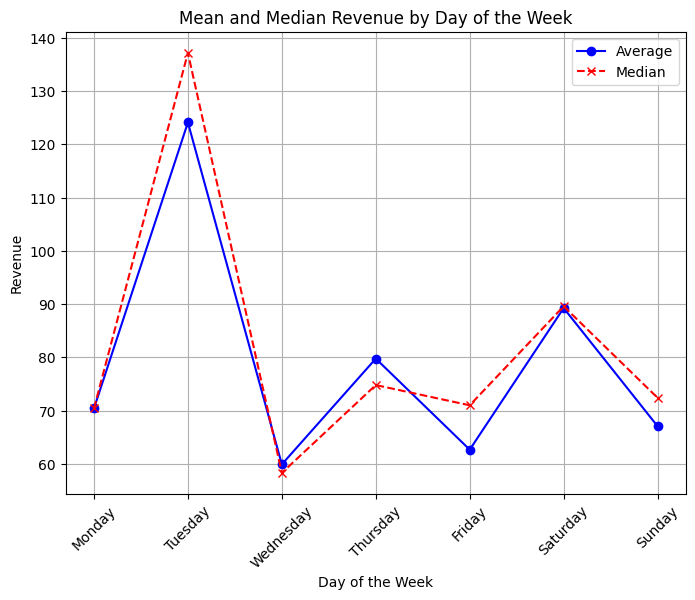

In [13]:
from dynamic_pricing.analysis.metrics import calculate_average_revenue_by_day_of_week

calculate_average_revenue_by_day_of_week(pre_dp_df,plot=True)
calculate_average_revenue_by_day_of_week(post_dp_df,plot=True)

In [14]:
from dynamic_pricing.analysis.metrics import calculate_revenue_by_day_period

time_intervals = ["00:00", "14:00", "18:45", "23:59:59"]
pre_dp_df_weekday_revenue = calculate_revenue_by_day_period(
    pre_dp_df_weekdays, time_intervals=time_intervals
)

pre_dp_df_weekend_revenue = calculate_revenue_by_day_period(
    pre_dp_df_weekends, time_intervals=time_intervals
)
post_dp_df_weekday_revenue = calculate_revenue_by_day_period(
    post_dp_df_weekdays, time_intervals=time_intervals
)
post_dp_df_weekend_revenue = calculate_revenue_by_day_period(
    post_dp_df_weekends, time_intervals=time_intervals
)

print(pre_dp_df_weekday_revenue, pre_dp_df_weekday_revenue.sum())
print(pre_dp_df_weekend_revenue, pre_dp_df_weekend_revenue.sum())
print(post_dp_df_weekday_revenue, post_dp_df_weekday_revenue.sum())
print(post_dp_df_weekend_revenue, post_dp_df_weekend_revenue.sum())

interval_label
00:00:00 to 14:00:00     34.2
14:00:00 to 18:45:00    448.2
18:45:00 to 23:59:59    103.2
Name: order_value, dtype: object 585.6
interval_label
00:00:00 to 14:00:00     84.0
14:00:00 to 18:45:00    231.5
18:45:00 to 23:59:59     37.9
Name: order_value, dtype: object 353.4
interval_label
00:00:00 to 14:00:00    191.6
14:00:00 to 18:45:00    715.1
18:45:00 to 23:59:59    213.5
Name: order_value, dtype: object 1120.2
interval_label
00:00:00 to 14:00:00     93.1
14:00:00 to 18:45:00    140.9
18:45:00 to 23:59:59    235.0
Name: order_value, dtype: object 469.0


In [15]:
from dynamic_pricing.analysis.metrics import calculate_profit_by_day_period


time_intervals = ["00:00", "14:00", "18:45", "23:59:59"]
pre_dp_df_weekday_profit = calculate_profit_by_day_period(
    pre_dp_df_weekdays, time_intervals=time_intervals
)

pre_dp_df_weekend_profit = calculate_profit_by_day_period(
    pre_dp_df_weekends, time_intervals=time_intervals
)
post_dp_df_weekday_profit = calculate_profit_by_day_period(
    post_dp_df_weekdays, time_intervals=time_intervals
)
post_dp_df_weekend_profit = calculate_profit_by_day_period(
    post_dp_df_weekends, time_intervals=time_intervals
)


print(pre_dp_df_weekday_profit, pre_dp_df_weekday_profit.sum())
print(pre_dp_df_weekend_profit, pre_dp_df_weekend_profit.sum())
print(post_dp_df_weekday_profit, post_dp_df_weekday_profit.sum())
print(post_dp_df_weekend_profit, post_dp_df_weekend_profit.sum())

interval_label
00:00:00 to 14:00:00     21.7
14:00:00 to 18:45:00    291.7
18:45:00 to 23:59:59     69.2
Name: profit, dtype: object 382.59999999999997
interval_label
00:00:00 to 14:00:00     53.0
14:00:00 to 18:45:00    146.0
18:45:00 to 23:59:59     21.4
Name: profit, dtype: object 220.4
interval_label
00:00:00 to 14:00:00    118.1
14:00:00 to 18:45:00    462.1
18:45:00 to 23:59:59    135.0
Name: profit, dtype: object 715.1999999999999
interval_label
00:00:00 to 14:00:00     58.1
14:00:00 to 18:45:00     89.9
18:45:00 to 23:59:59    148.0
Name: profit, dtype: object 296.0


In [16]:
from dynamic_pricing.analysis.metrics import calculate_orders_by_day_period

print(calculate_orders_by_day_period(pre_dp_df_weekdays, time_intervals))
print(calculate_orders_by_day_period(pre_dp_df_weekends, time_intervals))
print(calculate_orders_by_day_period(post_dp_df_weekdays, time_intervals))
print(calculate_orders_by_day_period(post_dp_df_weekends, time_intervals))

         interval_label  order_count
0  00:00:00 to 14:00:00            2
1  14:00:00 to 18:45:00           23
2  18:45:00 to 23:59:59            5
         interval_label  order_count
0  00:00:00 to 14:00:00            5
1  14:00:00 to 18:45:00           13
2  18:45:00 to 23:59:59            2
         interval_label  order_count
0  00:00:00 to 14:00:00           11
1  14:00:00 to 18:45:00           34
2  18:45:00 to 23:59:59           10
         interval_label  order_count
0  00:00:00 to 14:00:00            5
1  14:00:00 to 18:45:00            8
2  18:45:00 to 23:59:59           13
